## *ESTUDO DIRIGIDO - CONTROLE E AUTOMAÇÃO 2025.2*
### Livro texto da disciplina: Sistemas de Controle Modernos - 8a Edição


Aluno: João Marcos Amorim de Almeida

# Capítulo 10: O projeto de Sistemas de controle com retroação

Este capítulo aborda o projeto de compensadores, utilizando técnicas no domínio da frequência para alcançar o desempenho desejado do sistema. São apresentados controladores de avanço e atraso de fase, com exemplos práticos de projeto usando o gráfico do lugar das raízes e diagramas de Bode. O controlador proporcional e integral (PI) é revisado para garantir alta precisão no acompanhamento. O capítulo também explora o projeto de sistemas de controle com o método de variáveis de estado e conclui com o projeto de um controlador proporcional e derivativo (PD) com filtragem prévia, aplicado a um sistema de leitura de acionador de disco.

## Introdução
A compensação envolve a inserção de componentes adicionais na estrutura do sistema para equalizar ou compensar inadequações de desempenho. Esses componentes, chamados compensadores, podem ser elétricos, mecânicos, hidráulicos, pneumáticos ou de outros tipos. O capítulo enfatiza a necessidade de reprojetar sistemas para atender a requisitos específicos, como reduzir a ultrapassagem percentual ou ajustar a frequência natural, mesmo que isso implique em conflitos com outros parâmetros do sistema.

## Desempenho do Sistema de Controle
Um sistema de controle deve ser estável, ter respostas aceitáveis a entradas, ser insensível a variações de parâmetros, minimizar erros estacionários e reduzir perturbações.
Raramente se alcança desempenho ótimo sem ajustes, exigindo compromissos entre especificações conflitantes.

## Ajustes e Projeto de Parâmetros
Métodos como o lugar das raízes e análises no domínio da frequência são usados para ajustar parâmetros e melhorar o desempenho. Exemplos práticos incluem o projeto de uma balança com ajuste automático de escala.

## Limitações dos Ajustes de Parâmetros
Apenas ajustar parâmetros nem sempre é suficiente, exigindo a revisão da estrutura do sistema. Requisitos conflitantes (ex.: ultrapassagem percentual vs. frequência natural) podem demandar reprojeto.

## Compensação
Inserção de componentes adicionais (compensadores) para corrigir deficiências de desempenho.Compensadores podem ser elétricos, mecânicos, hidráulicos, pneumáticos, etc.

Simulações e Exemplos - Capítulo 10

In [1]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

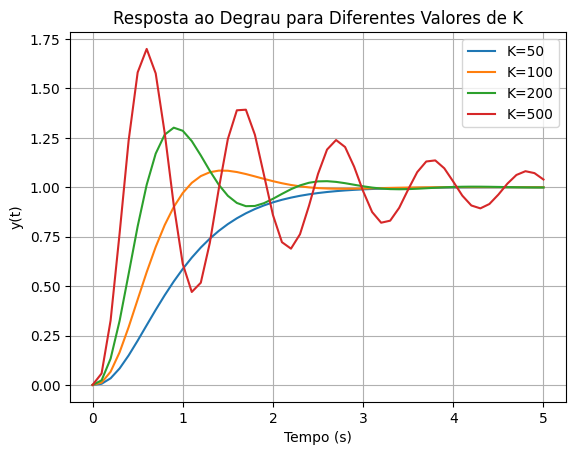

In [2]:
# Definindo os parâmetros
K = [50, 100, 200, 500]
numg = [1]
deng = [1, 15, 50, 0]
t = np.arange(0, 5.1, 0.1)  # Tempo de 0 a 5 com passo de 0.1

# Inicializando a matriz para armazenar as respostas
Ys = np.zeros((len(t), len(K)))

# Loop para calcular a resposta ao degrau para cada valor de K
for i in range(len(K)):
    # Criando a função de transferência com o ganho atual
    num_ka = [K[i] * coeff for coeff in numg]  # Multiplica cada coeficiente por K[i]
    den = deng

    # Criando a função de transferência do sistema
    sys_open_loop = ctl.tf(num_ka, den)

    # Criando o sistema em série com um sistema de ganho unitário
    sys_series = ctl.series(sys_open_loop, ctl.tf([1], [1]))

    # Criando o sistema de feedback
    sys_feedback = ctl.feedback(sys_series)

    # Calculando a resposta ao degrau
    t, y = ctl.step_response(sys_feedback, t)
    Ys[:, i] = y

# Plotando as respostas ao degrau
plt.plot(t, Ys[:, 0], '-', label='K=50')
plt.plot(t, Ys[:, 1], '-', label='K=100')
plt.plot(t, Ys[:, 2], '-', label='K=200')
plt.plot(t, Ys[:, 3], '-', label='K=500')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.title('Resposta ao Degrau para Diferentes Valores de K')
plt.show()

/usr/local/lib/python3.12/site-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


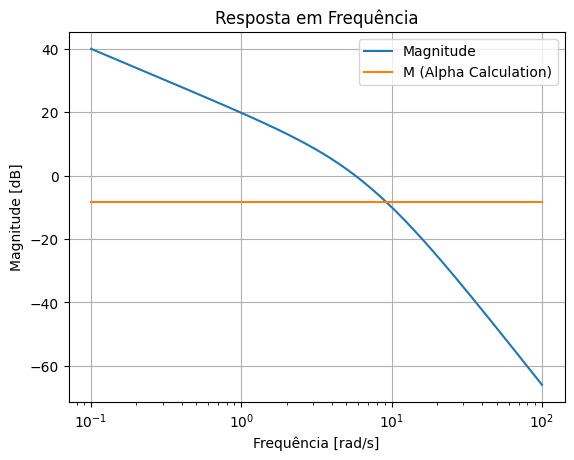

In [3]:
# Parâmetros
K = 500
numg = [1]
deng = [1, 15, 50, 0]

# Criando a função de transferência
num = [K * coeff for coeff in numg]  # Multiplica os coeficientes de numg por K
den = deng

# Criando o sistema
sys = ctl.tf(num, den)

# Frequências para o bode plot
w = np.logspace(-1, 2, 200)

# Resposta em frequência
mag, phase, _ = ctl.bode(sys, w, plot=False)

# Cálculo das margens de ganho e fase
Gm, Pm, Wcg, Wcp = ctl.margin(sys)

# Calculando Phi e alpha
Phi = (60 - Pm) * np.pi / 180
alpha = (1 + np.sin(Phi)) / (1 - np.sin(Phi))

# Calculando M
M = -10 * np.log10(alpha) * np.ones_like(w)

# Plotando o gráfico
plt.figure()
plt.semilogx(w, 20 * np.log10(mag), label='Magnitude')
plt.semilogx(w, M, label='M (Alpha Calculation)')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.title('Resposta em Frequência')
plt.show()

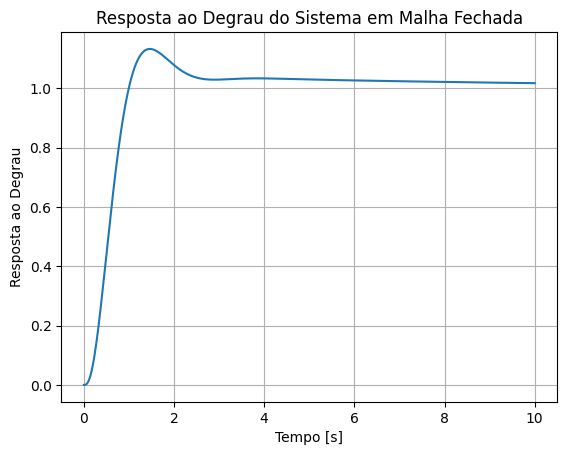

In [4]:
# Parâmetros
K = 100
numg = [1]
deng = [1, 15, 50, 0]

# Função de transferência do controlador
numgc = [K, K * 0.1]  # Numerador do controlador
dengc = [1, 0.01]     # Denominador do controlador

# Sistema em série
sys_open_loop = ctl.series(ctl.TransferFunction(numgc, dengc), ctl.TransferFunction(numg, deng))

# Sistema em malha fechada
sys_closed_loop = ctl.feedback(sys_open_loop)

# Tempo para resposta
t = np.linspace(0, 10, 1000)  # Define um vetor de tempo para a resposta

# Resposta ao degrau
t, y = ctl.step_response(sys_closed_loop, t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo [s]')
plt.ylabel('Resposta ao Degrau')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()